## Walmart Store Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Reading the datasets
df=pd.read_csv('C:\\Users\\shekh\\train.csv')
features_df=pd.read_csv('C:\\Users\\shekh\\features.csv')
stores_df=pd.read_csv('C:\\Users\\shekh\\stores.csv')
test_df=pd.read_csv('C:\\Users\\shekh\\test.csv')

In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
#Checking the dimentions of each dataset
print(df.shape)
print(features_df.shape)
print(stores_df.shape)
print(test_df.shape)

(421570, 5)
(8190, 12)
(45, 3)
(115064, 4)


In [8]:
#Merging feature and stores dataset with train dataset
dataset=df.merge(features_df, how='left').merge(stores_df,how='left')

In [9]:
#this is our new train dataset
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [10]:
#Now as we have to predict th weekly sales store wise so we dont require department variable.
data=dataset.drop(['Dept'],axis=1)

In [11]:
#Now i am rolling up train data on store level
grp=data.groupby(by=['Store','Date','Type'])

In [12]:
#So this is the final train datasel
train=pd.DataFrame(grp.agg({'IsHoliday':'mean','Weekly_Sales':'sum','Size':'mean','Temperature':'mean','Fuel_Price':'mean','MarkDown1':'size',
       'MarkDown2':'size','MarkDown3':'size','MarkDown4':'size','MarkDown5':'size','CPI':'sum','Unemployment':'sum' })).reset_index()

In [13]:
train=train.rename({'IsHoliday':'Average of IsHoliday','Weekly_Sales':'Sum of Weekly_Sales','Size':'Average of Size','Temperature':'Average of Temperature','Fuel_Price':'Average of Fuel_Price','MarkDown1':'Count of MarkDown1',
       'MarkDown2':'Count of MarkDown2','MarkDown3':'Count of MarkDown3','MarkDown4':'Count of MarkDown4','MarkDown5':'Count of MarkDown5','CPI':'Sum of CPI','Unemployment':'Sum of Unemployment'},axis=1)

In [14]:
train.head()

,Store,Date,Type,Average of IsHoliday,Sum of Weekly_Sales,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown1,Count of MarkDown2,Count of MarkDown3,Count of MarkDown4,Count of MarkDown5,Sum of CPI,Sum of Unemployment
0,1,2010-02-05,A,False,1643690.90,151315,42.31,2.572,73,73,73,73,73,15410.034149,591.738
1,1,2010-02-12,A,True,1641957.44,151315,38.51,2.548,72,72,72,72,72,15209.436226,583.632
2,1,2010-02-19,A,False,1611968.17,151315,39.93,2.514,73,73,73,73,73,15424.107432,591.738
3,1,2010-02-26,A,False,1409727.59,151315,46.63,2.561,72,72,72,72,72,15215.014289,583.632
4,1,2010-03-05,A,False,1554806.68,151315,46.50,2.625,73,73,73,73,73,15428.560432,591.738


In [15]:
train.shape

(6435, 15)

In [16]:
#Merging feature and stores dataset with test dataset
test_df=test_df.merge(features_df,how='left').merge(stores_df,how='left')

In [17]:
#this is our test dataset
test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [18]:
#Now as we have to predict th weekly sales store wise so we dont require department variable.
test_df=test_df.drop(['Dept'],axis=1)

In [19]:
#Now I am rolling up test data on store level
grp=test_df.groupby(by=['Store','Date','Type'])

In [20]:
#So this is the final train dataset

test=pd.DataFrame(grp.agg({'IsHoliday':'mean','Size':'mean','Temperature':'mean','Fuel_Price':'mean','MarkDown1':'size',
       'MarkDown2':'size','MarkDown3':'size','MarkDown4':'size','MarkDown5':'size','CPI':'sum','Unemployment':'sum' })).reset_index()

In [21]:
test=test.rename({'IsHoliday':'Average of IsHoliday','Size':'Average of Size','Temperature':'Average of Temperature','Fuel_Price':'Average of Fuel_Price','MarkDown1':'Count of MarkDown1',
       'MarkDown2':'Count of MarkDown2','MarkDown3':'Count of MarkDown3','MarkDown4':'Count of MarkDown4','MarkDown5':'Count of MarkDown5','CPI':'Sum of CPI','Unemployment':'Sum of Unemployment'},axis=1)

In [22]:
test.head()

,Store,Date,Type,Average of IsHoliday,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown1,Count of MarkDown2,Count of MarkDown3,Count of MarkDown4,Count of MarkDown5,Sum of CPI,Sum of Unemployment
0,1,2012-11-02,A,False,151315,55.32,3.386,71,71,71,71,71,15865.857330,466.683
1,1,2012-11-09,A,False,151315,61.24,3.314,71,71,71,71,71,15867.172818,466.683
2,1,2012-11-16,A,False,151315,52.92,3.252,71,71,71,71,71,15869.416645,466.683
3,1,2012-11-23,A,True,151315,56.23,3.211,72,72,72,72,72,16096.460213,473.256
4,1,2012-11-30,A,False,151315,52.34,3.207,73,73,73,73,73,16323.601847,479.829


In [23]:
test.shape

(1755, 14)

### Exploratory Data Analysis
#### 1.For Train data

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
Store                     6435 non-null int64
Date                      6435 non-null object
Type                      6435 non-null object
Average of IsHoliday      6435 non-null bool
Sum of Weekly_Sales       6435 non-null float64
Average of Size           6435 non-null int64
Average of Temperature    6435 non-null float64
Average of Fuel_Price     6435 non-null float64
Count of MarkDown1        6435 non-null int64
Count of MarkDown2        6435 non-null int64
Count of MarkDown3        6435 non-null int64
Count of MarkDown4        6435 non-null int64
Count of MarkDown5        6435 non-null int64
Sum of CPI                6435 non-null float64
Sum of Unemployment       6435 non-null float64
dtypes: bool(1), float64(5), int64(7), object(2)
memory usage: 710.2+ KB


In [25]:
train.isnull().sum()

Store                     0
Date                      0
Type                      0
Average of IsHoliday      0
Sum of Weekly_Sales       0
Average of Size           0
Average of Temperature    0
Average of Fuel_Price     0
Count of MarkDown1        0
Count of MarkDown2        0
Count of MarkDown3        0
Count of MarkDown4        0
Count of MarkDown5        0
Sum of CPI                0
Sum of Unemployment       0
dtype: int64

There is no missing values in train data

In [26]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000000,12.000000,23.000000,3.400000e+01,4.500000e+01
Sum of Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250000,553350.105000,960746.040000,1.420159e+06,3.818686e+06
Average of Size,6435.0,1.302876e+05,63117.022465,34875.000000,70713.000000,126512.000000,2.023070e+05,2.196220e+05
Average of Temperature,6435.0,6.066378e+01,18.444933,-2.060000,47.460000,62.670000,7.494000e+01,1.001400e+02
Average of Fuel_Price,6435.0,3.358607e+00,0.459020,2.472000,2.933000,3.445000,3.735000e+00,4.468000e+00
Count of MarkDown1,6435.0,6.551204e+01,8.517000,37.000000,65.000000,69.000000,7.100000e+01,7.600000e+01
Count of MarkDown2,6435.0,6.551204e+01,8.517000,37.000000,65.000000,69.000000,7.100000e+01,7.600000e+01
Count of MarkDown3,6435.0,6.551204e+01,8.517000,37.000000,65.000000,69.000000,7.100000e+01,7.600000e+01
Count of MarkDown4,6435.0,6.551204e+01,8.517000,37.000000,65.000000,69.000000,7.100000e+01,7.600000e+01
Count of MarkDown5,6435.0,6.551204e+01,8.517000,37.000000,65.000000,69.000000,7.100000e+01,7.600000e+01


In [27]:
pandas_profiling.ProfileReport(train)

C:\Users\shekh\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,6435
Total Missing (%),0.0%
Total size in memory,710.2 KiB
Average record size in memory,113.0 B
Numeric,8
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,4


### Treating Multicolinearity of train data

In [28]:
train=train.drop(['Count of MarkDown1','Count of MarkDown2','Count of MarkDown3','Count of MarkDown4'],axis=1)

In [29]:
#Function to show relationship of features with weeklySales 

def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Sum of Weekly_Sales'])
    plt.ylabel('sum of weeklySales')
    plt.xlabel(column)

In [30]:
train.columns

Index(['Store', 'Date', 'Type', 'Average of IsHoliday', 'Sum of Weekly_Sales',
       'Average of Size', 'Average of Temperature', 'Average of Fuel_Price',
       'Count of MarkDown5', 'Sum of CPI', 'Sum of Unemployment'],
      dtype='object')

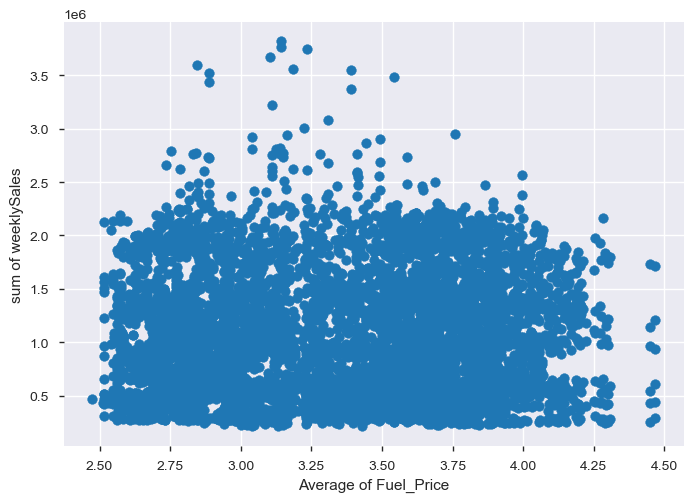

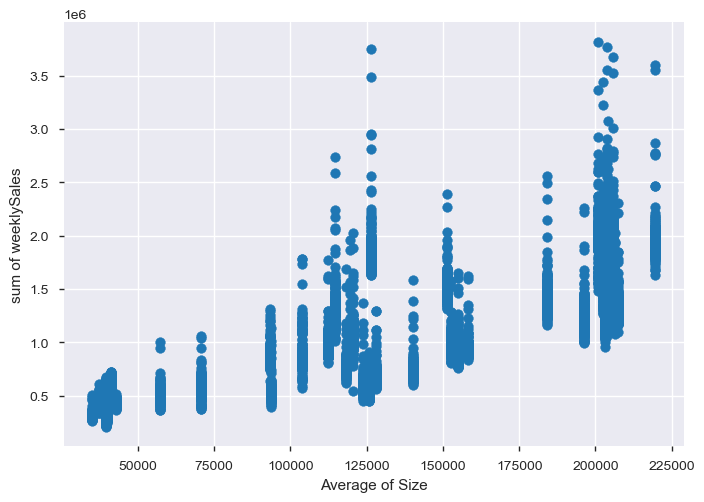

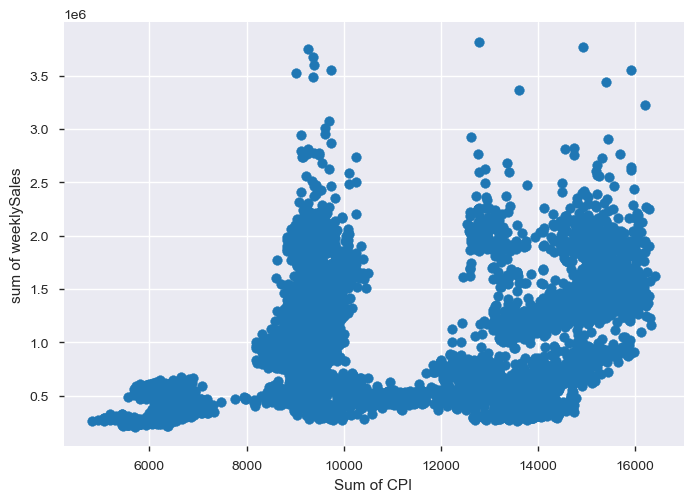

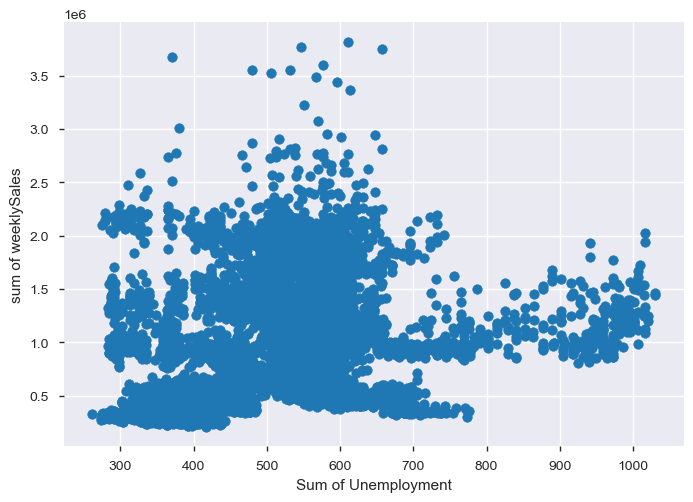

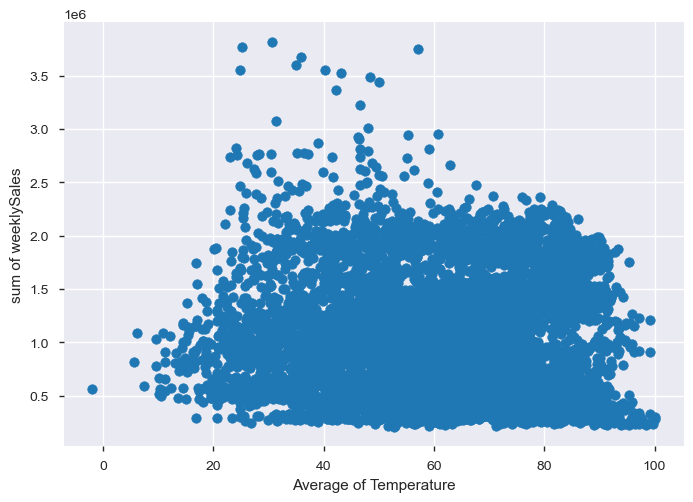

In [31]:
scatter(train, 'Average of Fuel_Price')
scatter(train, 'Average of Size')
scatter(train, 'Sum of CPI')
scatter(train, 'Sum of Unemployment')
scatter(train, 'Average of Temperature')

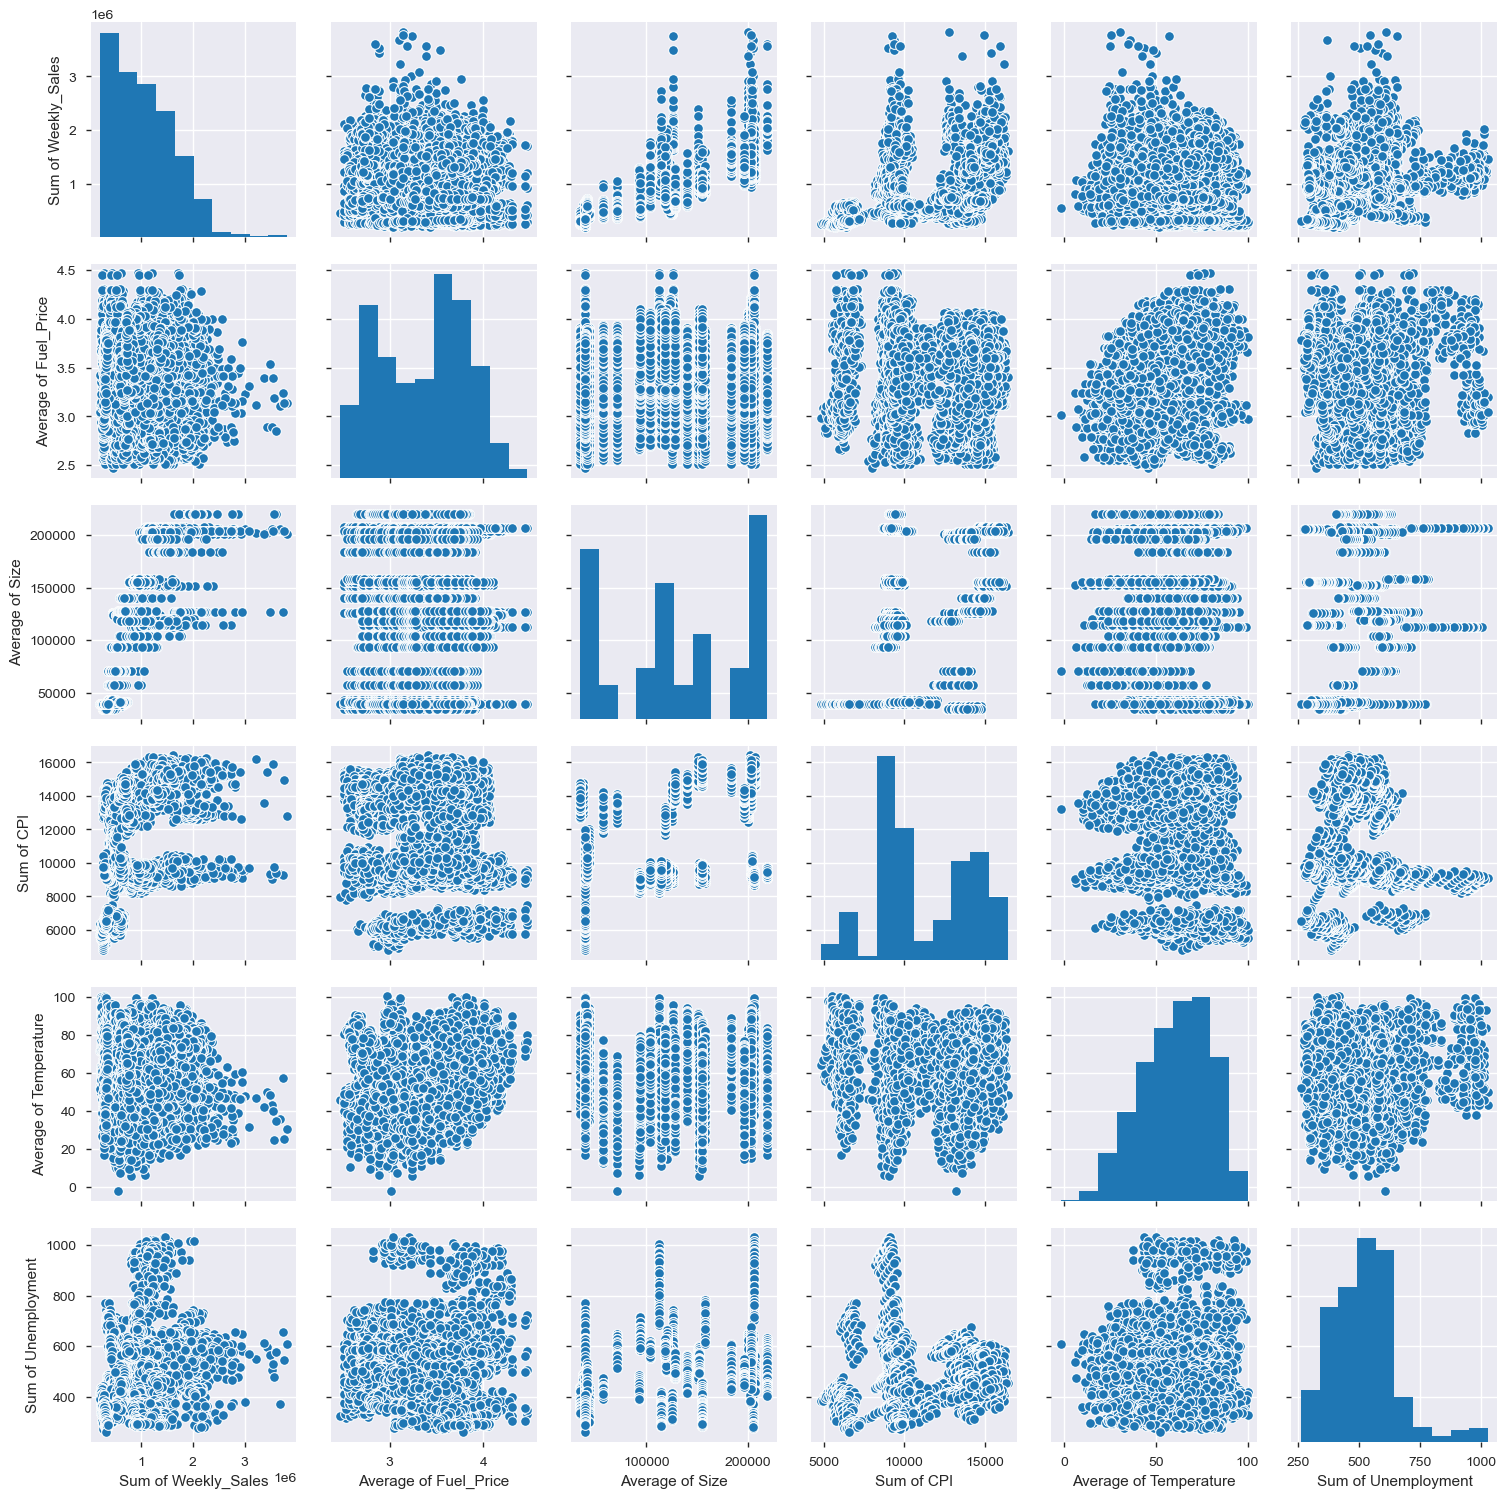

In [32]:
sns.pairplot(train,vars=['Sum of Weekly_Sales', 'Average of Fuel_Price', 'Average of Size', 'Sum of CPI','Average of Temperature', 'Sum of Unemployment'])

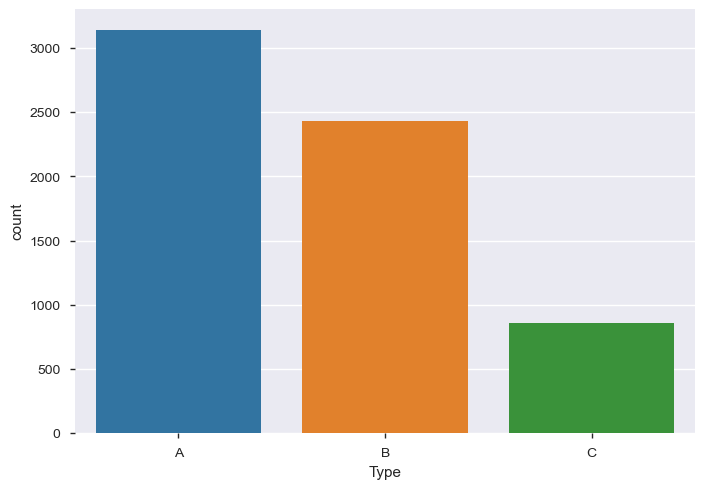

In [33]:
sns.countplot(train['Type'])

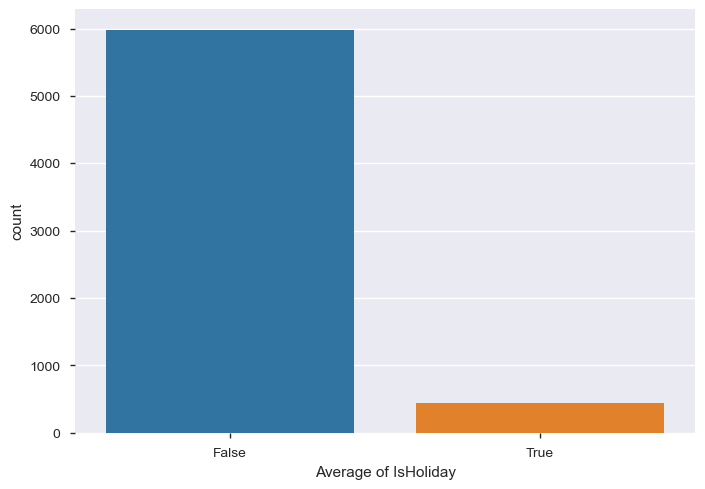

In [34]:
sns.countplot(train['Average of IsHoliday'])

#### 2. For test data

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 14 columns):
Store                     1755 non-null int64
Date                      1755 non-null object
Type                      1755 non-null object
Average of IsHoliday      1755 non-null bool
Average of Size           1755 non-null int64
Average of Temperature    1755 non-null float64
Average of Fuel_Price     1755 non-null float64
Count of MarkDown1        1755 non-null int64
Count of MarkDown2        1755 non-null int64
Count of MarkDown3        1755 non-null int64
Count of MarkDown4        1755 non-null int64
Count of MarkDown5        1755 non-null int64
Sum of CPI                1755 non-null float64
Sum of Unemployment       1755 non-null float64
dtypes: bool(1), float64(4), int64(7), object(2)
memory usage: 180.1+ KB


In [36]:
test.isnull().sum()

Store                     0
Date                      0
Type                      0
Average of IsHoliday      0
Average of Size           0
Average of Temperature    0
Average of Fuel_Price     0
Count of MarkDown1        0
Count of MarkDown2        0
Count of MarkDown3        0
Count of MarkDown4        0
Count of MarkDown5        0
Sum of CPI                0
Sum of Unemployment       0
dtype: int64

There is no missing values in test data

In [37]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1755.0,23.000000,12.990875,1.000,12.000,23.000,34.000000,45.000000
Average of Size,1755.0,130287.600000,63130.106425,34875.000,70713.000,126512.000,202307.000000,219622.000000
Average of Temperature,1755.0,54.561721,18.751992,-7.290,40.570,55.310,67.910000,101.950000
Average of Fuel_Price,1755.0,3.579737,0.239379,2.872,3.431,3.606,3.762500,4.125000
Count of MarkDown1,1755.0,65.563533,8.194391,41.000,65.000,69.000,71.000000,74.000000
Count of MarkDown2,1755.0,65.563533,8.194391,41.000,65.000,69.000,71.000000,74.000000
Count of MarkDown3,1755.0,65.563533,8.194391,41.000,65.000,69.000,71.000000,74.000000
Count of MarkDown4,1755.0,65.563533,8.194391,41.000,65.000,69.000,71.000000,74.000000
Count of MarkDown5,1755.0,65.563533,8.194391,41.000,65.000,69.000,71.000000,74.000000
Sum of CPI,1755.0,7754.234462,6008.623422,0.000,0.000,9478.224,13493.463109,16536.991951


In [38]:
pandas_profiling.ProfileReport(test)

C:\Users\shekh\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,1755
Total Missing (%),0.0%
Total size in memory,180.1 KiB
Average record size in memory,105.1 B
Numeric,7
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,4


### Treating Multicolinearity in Test Data

In [39]:
test=test.drop(['Count of MarkDown1','Count of MarkDown2','Count of MarkDown3','Count of MarkDown4'],axis=1)

### Data Preprocessing
#### 1. For Train Data

#### Dummy Creation For Categorical Variable

In [40]:
train.head()

,Store,Date,Type,Average of IsHoliday,Sum of Weekly_Sales,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,Sum of Unemployment
0,1,2010-02-05,A,False,1643690.90,151315,42.31,2.572,73,15410.034149,591.738
1,1,2010-02-12,A,True,1641957.44,151315,38.51,2.548,72,15209.436226,583.632
2,1,2010-02-19,A,False,1611968.17,151315,39.93,2.514,73,15424.107432,591.738
3,1,2010-02-26,A,False,1409727.59,151315,46.63,2.561,72,15215.014289,583.632
4,1,2010-03-05,A,False,1554806.68,151315,46.50,2.625,73,15428.560432,591.738


In [41]:
dummy_store=pd.get_dummies(train['Store'],prefix='store',drop_first=True)

In [42]:
dummy_type=pd.get_dummies(train['Type'],prefix='type',drop_first=True)

In [43]:
dummy_holiday=pd.get_dummies(train['Average of IsHoliday'],prefix='holiday',drop_first=True)

In [44]:
train_new=pd.concat([train,dummy_store,dummy_type,dummy_holiday],axis=1)

In [45]:
train_new.head()

,Store,Date,Type,Average of IsHoliday,Sum of Weekly_Sales,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,...,store_39,store_40,store_41,store_42,store_43,store_44,store_45,type_B,type_C,holiday_True
0,1,2010-02-05,A,False,1643690.90,151315,42.31,2.572,73,15410.034149,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,A,True,1641957.44,151315,38.51,2.548,72,15209.436226,...,0,0,0,0,0,0,0,0,0,1
2,1,2010-02-19,A,False,1611968.17,151315,39.93,2.514,73,15424.107432,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,A,False,1409727.59,151315,46.63,2.561,72,15215.014289,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,A,False,1554806.68,151315,46.50,2.625,73,15428.560432,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#We have dummies for these categorical variable ,so we are dropping these variables

train_new=train_new.drop(['Store','Average of IsHoliday','Type'],axis=1)

In [47]:
train_new.head()

,Date,Sum of Weekly_Sales,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,Sum of Unemployment,store_2,store_3,...,store_39,store_40,store_41,store_42,store_43,store_44,store_45,type_B,type_C,holiday_True
0,2010-02-05,1643690.90,151315,42.31,2.572,73,15410.034149,591.738,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,1641957.44,151315,38.51,2.548,72,15209.436226,583.632,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2010-02-19,1611968.17,151315,39.93,2.514,73,15424.107432,591.738,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,151315,46.63,2.561,72,15215.014289,583.632,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,1554806.68,151315,46.50,2.625,73,15428.560432,591.738,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
train_new.columns

Index(['Date', 'Sum of Weekly_Sales', 'Average of Size',
       'Average of Temperature', 'Average of Fuel_Price', 'Count of MarkDown5',
       'Sum of CPI', 'Sum of Unemployment', 'store_2', 'store_3', 'store_4',
       'store_5', 'store_6', 'store_7', 'store_8', 'store_9', 'store_10',
       'store_11', 'store_12', 'store_13', 'store_14', 'store_15', 'store_16',
       'store_17', 'store_18', 'store_19', 'store_20', 'store_21', 'store_22',
       'store_23', 'store_24', 'store_25', 'store_26', 'store_27', 'store_28',
       'store_29', 'store_30', 'store_31', 'store_32', 'store_33', 'store_34',
       'store_35', 'store_36', 'store_37', 'store_38', 'store_39', 'store_40',
       'store_41', 'store_42', 'store_43', 'store_44', 'store_45', 'type_B',
       'type_C', 'holiday_True'],
      dtype='object')

#### 2. For Test Data

#### Dummy Creation for Categorical Variables

In [49]:
dummy_store=pd.get_dummies(test['Store'],prefix='store',drop_first=True)
dummy_type=pd.get_dummies(test['Type'],prefix='type',drop_first=True)
dummy_holiday=pd.get_dummies(test['Average of IsHoliday'],prefix='holiday',drop_first=True)

In [50]:
test_new=pd.concat([test,dummy_store,dummy_type,dummy_holiday],axis=1)

In [51]:
#We  created dummies for these categorical variable,so now these variables are reductant

test_new=test_new.drop(['Store','Average of IsHoliday','Type'],axis=1)

In [52]:
test_new.head()

,Date,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,Sum of Unemployment,store_2,store_3,store_4,...,store_39,store_40,store_41,store_42,store_43,store_44,store_45,type_B,type_C,holiday_True
0,2012-11-02,151315,55.32,3.386,71,15865.857330,466.683,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-11-09,151315,61.24,3.314,71,15867.172818,466.683,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-11-16,151315,52.92,3.252,71,15869.416645,466.683,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-11-23,151315,56.23,3.211,72,16096.460213,473.256,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2012-11-30,151315,52.34,3.207,73,16323.601847,479.829,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
test_new.columns

Index(['Date', 'Average of Size', 'Average of Temperature',
       'Average of Fuel_Price', 'Count of MarkDown5', 'Sum of CPI',
       'Sum of Unemployment', 'store_2', 'store_3', 'store_4', 'store_5',
       'store_6', 'store_7', 'store_8', 'store_9', 'store_10', 'store_11',
       'store_12', 'store_13', 'store_14', 'store_15', 'store_16', 'store_17',
       'store_18', 'store_19', 'store_20', 'store_21', 'store_22', 'store_23',
       'store_24', 'store_25', 'store_26', 'store_27', 'store_28', 'store_29',
       'store_30', 'store_31', 'store_32', 'store_33', 'store_34', 'store_35',
       'store_36', 'store_37', 'store_38', 'store_39', 'store_40', 'store_41',
       'store_42', 'store_43', 'store_44', 'store_45', 'type_B', 'type_C',
       'holiday_True'],
      dtype='object')

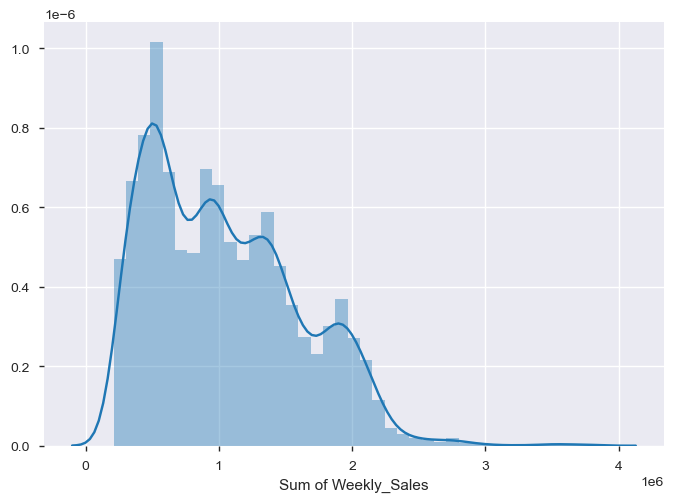

In [54]:
#Checking the distribution of the response variable fo normal distribution

sns.distplot(train_new['Sum of Weekly_Sales'])

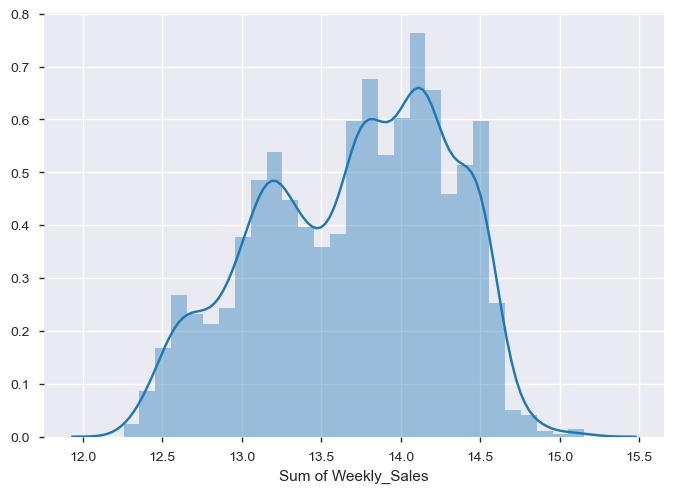

In [55]:
#Taking log of response variable so that it resonated with the normal distribution

sns.distplot(np.log(train_new['Sum of Weekly_Sales']+1))

In [56]:
#Taking log of response variable and incorporating it into the train dataset

train_new['ln_Sum of Weekly_Sales']=np.log(train_new['Sum of Weekly_Sales']+1)

In [57]:
#Droping the original response variable because we already have it in log transformed way 

train_new=train_new.drop('Sum of Weekly_Sales',axis=1)

In [58]:
train_new.columns

Index(['Date', 'Average of Size', 'Average of Temperature',
       'Average of Fuel_Price', 'Count of MarkDown5', 'Sum of CPI',
       'Sum of Unemployment', 'store_2', 'store_3', 'store_4', 'store_5',
       'store_6', 'store_7', 'store_8', 'store_9', 'store_10', 'store_11',
       'store_12', 'store_13', 'store_14', 'store_15', 'store_16', 'store_17',
       'store_18', 'store_19', 'store_20', 'store_21', 'store_22', 'store_23',
       'store_24', 'store_25', 'store_26', 'store_27', 'store_28', 'store_29',
       'store_30', 'store_31', 'store_32', 'store_33', 'store_34', 'store_35',
       'store_36', 'store_37', 'store_38', 'store_39', 'store_40', 'store_41',
       'store_42', 'store_43', 'store_44', 'store_45', 'type_B', 'type_C',
       'holiday_True', 'ln_Sum of Weekly_Sales'],
      dtype='object')

In [59]:
#Checking correlations of every independent variable with dependent variable

train_new.corr()[-1:]

,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,Sum of Unemployment,store_2,store_3,store_4,store_5,...,store_40,store_41,store_42,store_43,store_44,store_45,type_B,type_C,holiday_True,ln_Sum of Weekly_Sales
ln_Sum of Weekly_Sales,0.866401,-0.092519,0.018771,0.758703,0.308225,0.327155,0.195494,-0.205522,0.216908,-0.266051,...,0.018069,0.087623,-0.122174,-0.088475,-0.277933,-0.035173,-0.249409,-0.445263,0.02677,1.0


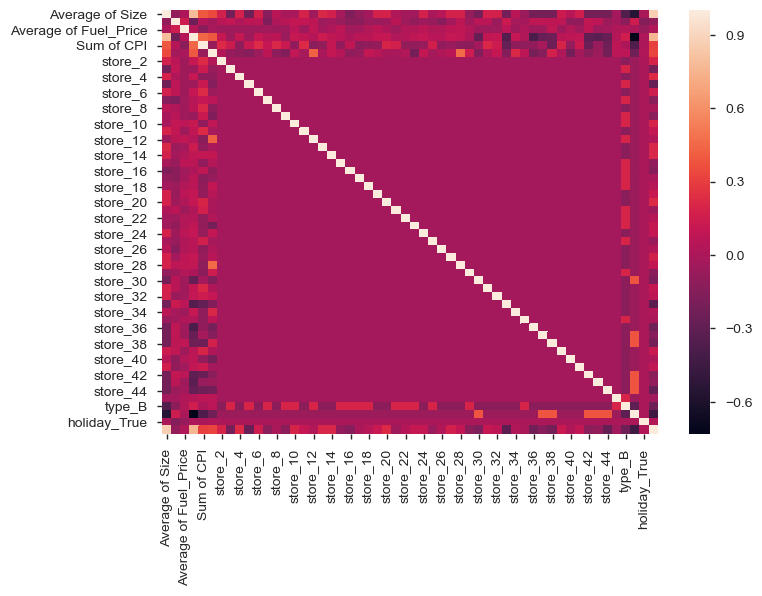

In [60]:
#Heat map of the correlation

sns.heatmap(train_new.corr())

### Model Building

#### Linear Regression Model

In [61]:
#Procuring list of all independent variables excluding the date variable and the dependent variable

feature_columns=train_new.columns.difference(['ln_Sum of Weekly_Sales','Date'])

In [62]:
#Seperating into train and test for the train data

X_train,X_test,y_train,y_test=train_test_split(train_new[feature_columns],train_new['ln_Sum of Weekly_Sales']
                                               ,test_size=0.3,
                                                random_state=857)

In [63]:
#Adding constant to the train data
X_train = sm.add_constant(X_train)

C:\Users\shekh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
#Building and Fitting the model     
lm=sm.OLS(y_train,X_train).fit()

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ln_Sum of Weekly_Sales   R-squared:                       0.959
Model:                                OLS   Adj. R-squared:                  0.958
Method:                     Least Squares   F-statistic:                     2072.
Date:                    Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                            22:51:03   Log-Likelihood:                 3146.2
No. Observations:                    4504   AIC:                            -6190.
Df Residuals:                        4453   BIC:                            -5863.
Df Model:                              50                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.9046      0.081    121.984      0.000       9.745      10.064
Average of Fuel_Price     -0.0366      0.006     -5.914      0.000      -0.049      -0.024
Average of Size         2.218e-05   2.68e-07     82.887      0.000    2.17e-05    2.27e-05
Average of Temperature    -0.0003      0.000     -2.230      0.026      -0.001   -3.27e-05
Count of MarkDown5         0.0097      0.003      3.566      0.000       0.004       0.015
Sum of CPI               3.58e-05   1.23e-05      2.905      0.004    1.16e-05       6e-05
Sum of Unemployment       -0.0002   5.85e-05     -3.860      0.000      -0.000      -0.000
holiday_True               0.0589      0.007      7.870      0.000       0.044       0.074
store_10                   0.4560      0.036     12.700      0.000       0.386       0.526
store_11                  -1.3714      0.024    -58.043      0.000      -1.418      -1.325
store_12                   0.2658      0.035      7.555      0.000       0.197       0.335
store_13                  -1.0647      0.073    -14.674      0.000      -1.207      -0.922
store_14                  -0.7288      0.028    -26.098      0.000      -0.784      -0.674
store_15                  -0.5767      0.030    -19.071      0.000      -0.636      -0.517
store_16                   0.5596      0.019     30.151      0.000       0.523       0.596
store_17                   0.4465      0.041     10.927      0.000       0.366       0.527
store_18                   0.0357      0.029      1.226      0.220      -0.021       0.093
store_19                  -1.0139      0.067    -15.027      0.000      -1.146      -0.882
store_2                   -0.9155      0.021    -44.118      0.000      -0.956      -0.875
store_20                  -0.8448      0.020    -41.570      0.000      -0.885      -0.805
store_21                  -0.9422      0.045    -20.746      0.000      -1.031      -0.853
store_22                   0.0064      0.027      0.238      0.812      -0.046       0.059
store_23                   0.3422      0.038      9.072      0.000       0.268       0.416
store_24                  -1.0726      0.067    -16.026      0.000      -1.204      -0.941
store_25                  -0.7568      0.037    -20.221      0.000      -0.830      -0.683
store_26                  -0.2105      0.072     -2.904      0.004      -0.353      -0.068
store_27                  -0.8314      0.064    -12.922      0.000      -0.958      -0.705
store_28                  -1.0436      0.068    -15.382      0.000      -1.177      -0.911
store_29                  -0.0068      0.031     -0.224      0.823      -0.067       0.053
store_3                    0.7508      0.032     23.142      0.000       0.687       0.814
store_30                   0.0369   

### MSE MAE RMSE of the Model

In [66]:
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)

from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.08263374265666658
MSE: 0.013430580104108535
RMSE: 0.11589037968748112


In [67]:
# A view of the actual and the predicted values by the model
pd.DataFrame({'Actual':np.exp(y_test),'Pred':np.exp(y_pred)}).head()

,Actual,Pred
3051,873955.70,9.935369e+05
1453,1290610.54,1.328633e+06
4994,887980.47,9.123453e+05
4557,1196881.11,1.138371e+06
2008,593711.67,6.208695e+05


### Predicting on Test data

In [68]:
#Adding constant to the test data 

X_test = sm.add_constant(test_new[test_new.columns.difference(['Date'])])

C:\Users\shekh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
# Predicting the weekly sales for the test data

Weekly_Sales_Predictions=lm.predict(sm.add_constant(test_new[test_new.columns.difference(['Date'])]))

In [70]:
# Converting the Weekly_Sales from log values to their normal non log values  

Weekly_Sales_Predictions=np.exp(Weekly_Sales_Predictions.head())

In [71]:
Weekly_Sales_Predictions

0    1.577701e+06
1    1.579403e+06
2    1.586681e+06
3    1.711565e+06
4    1.642245e+06
dtype: float64

In [72]:
Weekly_Sales_Predictions.name='Weekly_Sales_Prediction'

In [73]:
#This is the test dataframe with which predicted weekly sales have been incorporated

Predictions=pd.concat([test,Weekly_Sales_Predictions],axis=1)

#### Prediction Output For Test Data

In [74]:
Predictions.head()

,Store,Date,Type,Average of IsHoliday,Average of Size,Average of Temperature,Average of Fuel_Price,Count of MarkDown5,Sum of CPI,Sum of Unemployment,Weekly_Sales_Prediction
0,1,2012-11-02,A,False,151315,55.32,3.386,71,15865.857330,466.683,1.577701e+06
1,1,2012-11-09,A,False,151315,61.24,3.314,71,15867.172818,466.683,1.579403e+06
2,1,2012-11-16,A,False,151315,52.92,3.252,71,15869.416645,466.683,1.586681e+06
3,1,2012-11-23,A,True,151315,56.23,3.211,72,16096.460213,473.256,1.711565e+06
4,1,2012-11-30,A,False,151315,52.34,3.207,73,16323.601847,479.829,1.642245e+06
